In [1]:
using LinearAlgebra, Plots

$$
u'' = \cos x^2,
u(0) = 1,
u(1) = 2
$$

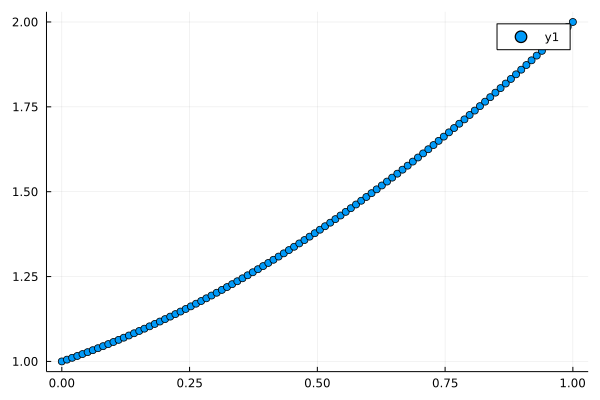

In [16]:
n = 100
x = range(0, 1; length=n)
h = step(x)
Δ = SymTridiagonal(fill(-2,n-2), fill(1,n-2))

f = x -> cos(x^2)
c₀ = 1
c₁ = 2

ũ = (Δ/h^2) \ [f(x[2]) - c₀/h^2; f.(x[3:end-2]); f(x[end-1]) - c₁/h^2]
u = [c₀; ũ; c₁]

scatter(x, u)

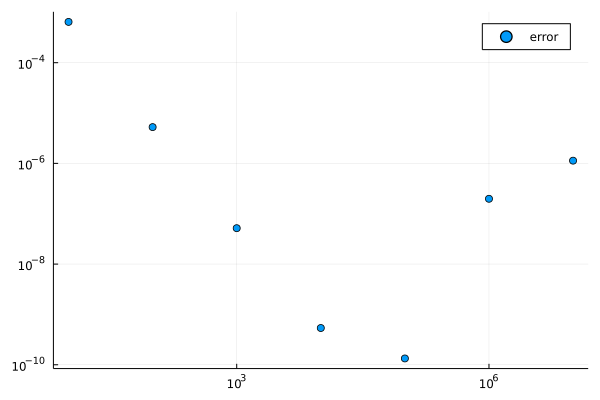

In [23]:
u_ex = x -> cos(x^2)
f = x -> -4x^2*cos(x^2) - 2sin(x^2)

function poisson_err(u_ex, f, n)
    c₀ = u_ex(0)
    c₁ = u_ex(1)
    x = range(0, 1; length=n)
    h = step(x)
    Δ = SymTridiagonal(fill(-2,n-2), fill(1,n-2))

    ũ = (Δ/h^2) \ [f(x[2]) - c₀/h^2; f.(x[3:end-2]); f(x[end-1]) - c₁/h^2]
    u = [c₀; ũ; c₁] # computed solution to Possionn at grid
    norm(u_ex.(x) - u, Inf)
end

ns = 10 .^ (1:7)
scatter(ns, poisson_err.(u_ex, f, ns); scale=:log10, yscale=:log10, label="error")
# we observe instability / ill-